### Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing the File
train_filepath = open(r"E:\Machine Learning\Project\Train.csv")
test_filepath = open(r"E:\Machine Learning\Project\Test.csv")

train = pd.read_csv(train_filepath)
test = pd.read_csv(test_filepath)

### Train Data

In [3]:
print("Train Data:")
print("Rows, Columns", train.shape, "\n")
train

Train Data:
Rows, Columns (9568, 5) 



,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723
...,...,...,...,...,...
9563,4.44,38.44,1016.14,75.35,499.615488
9564,18.18,67.71,1004.50,87.26,461.130122
9565,10.96,45.01,1017.97,95.82,481.245635
9566,8.70,36.24,1013.34,89.50,490.928341


### Test (PE will be predicted)

In [4]:
print("Test Data:")
print("Rows, Columns", test.shape, "\n")
test

Test Data:
Rows, Columns (38272, 4) 



,AT,V,AP,RH
0,16.98,53.16,1013.95,82.80
1,9.60,41.03,1021.01,69.03
2,6.11,38.68,1017.53,79.23
3,12.34,43.22,1009.28,78.23
4,27.67,59.14,1016.51,61.20
...,...,...,...,...
38267,14.60,53.82,1016.28,64.83
38268,29.67,66.51,1015.60,34.10
38269,20.13,47.03,1012.59,83.03
38270,27.14,70.32,1007.08,73.08


### Pre-Processing and Linear Regression

Linear Regression MSE: 22.208463017243325 
Linear Regression RMSE: 4.712585597869107 
Linear Regression MAE: 3.7581669095283132 
Linear Regression MAPE: 0.008064562064841746 
Linear Regression R-Squared: 0.9219110291139526 



[Text(0.5, 1.0, 'Predicted vs Actual Hourly Energy Output (Linear Regression)'),
 Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted')]

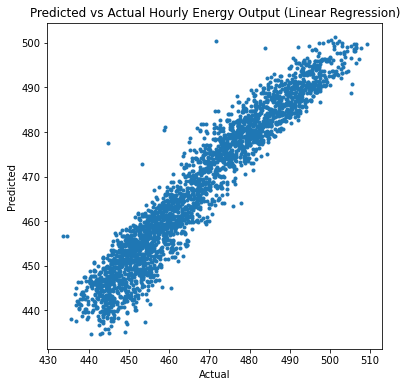

In [5]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

feature_cols = train.columns[:-1]

xdata = train[feature_cols]
ydata = train['PE']

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.3, random_state = 42)

# Linear Regression: Fitting and Predicting
LR = LinearRegression()
LR = LR.fit(xtrain, ytrain)
ypred_LR = LR.predict(xtest)

# Linear Regression Errors
rmse_LR = sqrt(mean_squared_error(ytest, ypred_LR))
mse_LR = mean_squared_error(ytest, ypred_LR)
r2_LR = r2_score(ytest, ypred_LR)
mae_LR = mean_absolute_error(ytest, ypred_LR)
mape_LR = mean_absolute_percentage_error(ytest, ypred_LR)

print("Linear Regression MSE:", mse_LR,
      "\nLinear Regression RMSE:", rmse_LR,
      "\nLinear Regression MAE:", mae_LR,
      "\nLinear Regression MAPE:", mape_LR,
      "\nLinear Regression R-Squared:", r2_LR, "\n")

# Plotting Linear Regression
f = plt.figure(figsize = (6,6))
ax = plt.axes()
ax.plot(ytest, ypred_LR, marker = 'o', ms = 3.0, ls = '')
ax.set(title = 'Predicted vs Actual Hourly Energy Output (Linear Regression)', xlabel = 'Actual', ylabel = 'Predicted')

### Ridge Regression

Best Alpha: 0.005 
RidgeCV MSE:  22.20846309058912 
RidgeCV RMSE: 4.712585605651013 
RidgeCV MAE: 3.758166926057335 
RidgeCV MAPE: 0.008064562094333516 
RidgeCV R-Squared: 0.9219110288560556 



[Text(0.5, 1.0, 'Predicted vs Actual Hourly Energy Output (Ridge Regression)'),
 Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted')]

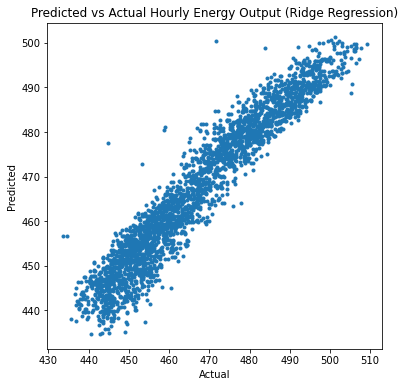

In [6]:
# Ridge Regression
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas = alphas, cv = 4).fit(xtrain, ytrain)
ypred_RCV = ridgeCV.predict(xtest)

# Errors
ridgeCV_rmse = sqrt(mean_squared_error(ytest, ypred_RCV))
ridgeCV_mse = mean_squared_error(ytest, ypred_RCV)
ridgeCV_mae = mean_absolute_error(ytest, ypred_RCV)
ridgeCV_mape = mean_absolute_percentage_error(ytest, ypred_RCV)
ridgeCV_r2 = r2_score(ytest, ypred_RCV)

print("Best Alpha:", ridgeCV.alpha_,
      "\nRidgeCV MSE: ", ridgeCV_mse,
      "\nRidgeCV RMSE:", ridgeCV_rmse,
      "\nRidgeCV MAE:", ridgeCV_mae,
      "\nRidgeCV MAPE:", ridgeCV_mape,
      "\nRidgeCV R-Squared:", ridgeCV_r2, "\n")

# Plotting RidgCV
f = plt.figure(figsize = (6,6))
ax = plt.axes()
ax.plot(ytest, ypred_RCV, marker = 'o', ms = 3.0, ls = '')
ax.set(title = 'Predicted vs Actual Hourly Energy Output (Ridge Regression)', xlabel = 'Actual', ylabel = 'Predicted')

### Lasso Regression

Best Alpha: 5e-05 
LassoCV MSE:  22.208459191642614 
LassoCV RMSE: 4.712585191977182 
LassoCV MAE: 3.7581662561976743 
LassoCV MAPE: 0.00806456093714887 
LassoCV R-Squared: 0.9219110425654563 



[Text(0.5, 1.0, 'Predicted vs Actual Hourly Energy Output (Lasso Regression)'),
 Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted')]

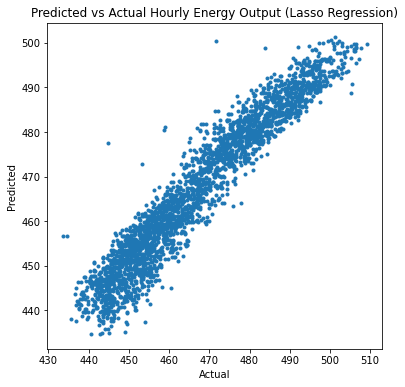

In [7]:
# Lasso Regression
alphas2 = [1e-5, 5e-5, 0.0001, 0.0005]
lassoCV = LassoCV(alphas = alphas2, max_iter = 5e4, cv = 3).fit(xtrain, ytrain)

ypred_LCV = lassoCV.predict(xtest)

# Errors
lassoCV_rmse = sqrt(mean_squared_error(ytest, ypred_LCV))
lassoCV_mse = mean_squared_error(ytest, ypred_LCV)
lassoCV_mae = mean_absolute_error(ytest, ypred_LCV)
lassoCV_mape = mean_absolute_percentage_error(ytest, ypred_LCV)
lassoCV_r2 = r2_score(ytest, ypred_LCV)

print("Best Alpha:", lassoCV.alpha_,
      "\nLassoCV MSE: ", lassoCV_mse,
      "\nLassoCV RMSE:", lassoCV_rmse,
      "\nLassoCV MAE:", lassoCV_mae,
      "\nLassoCV MAPE:", lassoCV_mape,
      "\nLassoCV R-Squared:", lassoCV_r2, "\n")

# Plotting LassoCV
f = plt.figure(figsize = (6,6))
ax = plt.axes()
ax.plot(ytest, ypred_LCV, marker = 'o', ms = 3.0, ls = '')
ax.set(title = 'Predicted vs Actual Hourly Energy Output (Lasso Regression)', xlabel = 'Actual', ylabel = 'Predicted')

### Elastic Net

Best Alpha: 0.0005 
Elastic-NetCV MSE:  22.20846009714703 
Elastic-NetCV RMSE: 4.7125852880501835 
Elastic-NetCV MAE: 3.7581675107209 
Elastic-NetCV MAPE: 0.008064563367720028 
Elastic-NetCV R-Squared: 0.9219110393815392 



[Text(0.5, 1.0, 'Predicted vs Actual Hourly Energy Output (Elastic-Net Regression)'),
 Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted')]

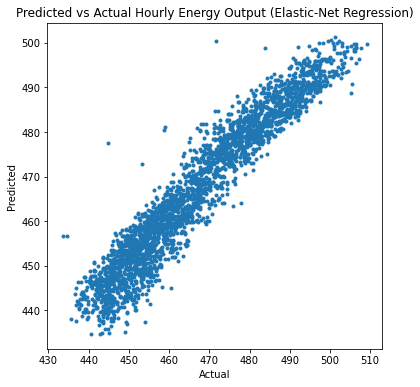

In [8]:
# Elastic Net
l1_ratios = np.linspace(0.1, 0.9, 9)
elasticNetCV = ElasticNetCV(alphas = alphas2, l1_ratio = l1_ratios, max_iter = 1e4).fit(xtrain, ytrain)
ypred_ENCV = elasticNetCV.predict(xtest)

# Errors
elasticNetCV_rmse = sqrt(mean_squared_error(ytest, ypred_ENCV))
elasticNetCV_mse = mean_squared_error(ytest, ypred_ENCV)
elasticNetCV_mae = mean_absolute_error(ytest, ypred_ENCV)
elasticNetCV_mape = mean_absolute_percentage_error(ytest, ypred_ENCV)
elasticNetCV_r2 = r2_score(ytest, ypred_ENCV)

print("Best Alpha:", elasticNetCV.alpha_,
      "\nElastic-NetCV MSE: ", elasticNetCV_mse,
      "\nElastic-NetCV RMSE:", elasticNetCV_rmse,
      "\nElastic-NetCV MAE:", elasticNetCV_mae,
      "\nElastic-NetCV MAPE:", elasticNetCV_mape,
      "\nElastic-NetCV R-Squared:", elasticNetCV_r2, "\n")

# Plotting Elastic-Net CV
f = plt.figure(figsize = (6,6))
ax = plt.axes()
ax.plot(ytest, ypred_ENCV, marker = 'o', ms = 3.0, ls = '')
ax.set(title = 'Predicted vs Actual Hourly Energy Output (Elastic-Net Regression)', xlabel = 'Actual', ylabel = 'Predicted')

### KNN Regressor

In [9]:
# KNN Regressor: Testing various k neigbors
errorList = list()
for k in range(1, 10):
    KNN = KNeighborsRegressor(n_neighbors = k)
    KNN = KNN.fit(xtrain, ytrain)
    ypredict_KNN = KNN.predict(xtest)
    knn_rmse = sqrt(mean_squared_error(ytest, ypredict_KNN))
    knn_mse = mean_squared_error(ytest, ypredict_KNN)
    knn_mae = mean_absolute_error(ytest, ypredict_KNN)
    knn_mape = mean_absolute_percentage_error(ytest, ypredict_KNN)
    knn_r2 = r2_score(ytest, ypredict_KNN)
    errorList.append((k, knn_mse, knn_rmse, knn_mae, knn_mape, knn_r2))
error_df = pd.DataFrame(errorList, columns = ['K', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R^2'])

error_df

,K,MSE,RMSE,MAE,MAPE,R^2
0,1,14.604987,3.821647,2.498038,0.005366,0.948646
1,2,14.181611,3.765848,2.663358,0.005721,0.950135
2,3,14.782327,3.844779,2.838465,0.006092,0.948023
3,4,15.426672,3.927680,2.907300,0.006238,0.945757
4,5,15.681565,3.959996,2.948056,0.006325,0.944861
5,6,15.932094,3.991503,2.984852,0.006402,0.943980
6,7,16.075200,4.009389,3.007458,0.006450,0.943477
7,8,16.608688,4.075376,3.070116,0.006582,0.941601
8,9,16.898264,4.110750,3.104823,0.006656,0.940583


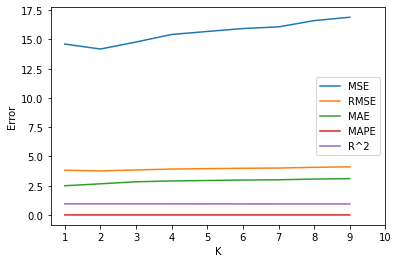

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting Errors v. K
ax = error_df.set_index('K').plot()
ax.set(xlabel = 'K', ylabel = 'Error')
ax.set_xticks(range(1, 11))


KNN MSE: 14.78232654997586 
KNN RMSE: 3.8447791288936037 
KNN MAE: 2.8384654456309955 
KNN MAPE: 0.006091759405423745 
KNN R-Squared: 0.9480226674537159 



[Text(0.5, 1.0, 'Predicted vs Actual Hourly Energy Output (KNN Regressor)'),
 Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted')]

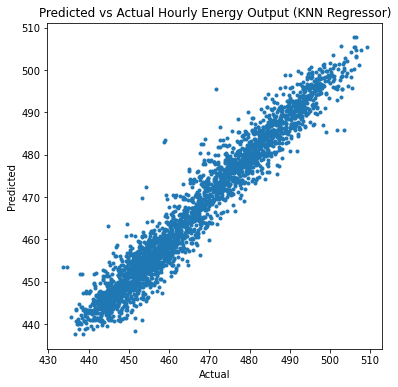

In [11]:
# Using the best performing n_neighbors
KNN = KNeighborsRegressor(n_neighbors = 3)
KNN = KNN.fit(xtrain, ytrain)
ypred_KNN = KNN.predict(xtest)

# Errors
knn_rmse = sqrt(mean_squared_error(ytest, ypred_KNN))
knn_mse = mean_squared_error(ytest, ypred_KNN)
knn_mae = mean_absolute_error(ytest, ypred_KNN)
knn_mape = mean_absolute_percentage_error(ytest, ypred_KNN)
knn_r2 = r2_score(ytest, ypred_KNN)


print("\nKNN MSE:", knn_mse,
      "\nKNN RMSE:", knn_rmse,
      "\nKNN MAE:", knn_mae,
      "\nKNN MAPE:", knn_mape,
      "\nKNN R-Squared:", knn_r2, "\n")

# Plotting KNN Regressor
f = plt.figure(figsize = (6,6))
ax = plt.axes()
ax.plot(ytest, ypred_KNN, marker = 'o', ms = 3.0, ls = '')
ax.set(title = 'Predicted vs Actual Hourly Energy Output (KNN Regressor)', xlabel = 'Actual', ylabel = 'Predicted')

### Decision Tree Regressor


Decision Tree Regressor MSE: 14.354884606976436 
Decision Tree Regressor RMSE: 3.78878405388542 
Decision Tree Regressor MAE: 2.452637094527969 
Decision Tree Regressor MAPE: 0.005256197261311085 
Decision Tree Regressor R-Squared: 0.9495256305996319 



[Text(0.5, 1.0, 'Predicted vs Actual Hourly Energy Output (Decision Tree Regressor)'),
 Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted')]

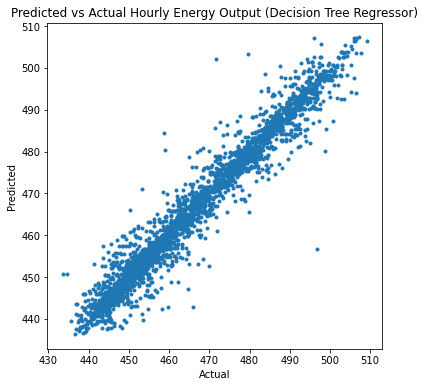

In [12]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr = dtr.fit(xtrain, ytrain)
ypred_dtr = dtr.predict(xtest)

# Errors
dtr_rmse = sqrt(mean_squared_error(ytest, ypred_dtr))
dtr_mse = mean_squared_error(ytest, ypred_dtr)
dtr_mae = mean_absolute_error(ytest, ypred_dtr)
dtr_mape = mean_absolute_percentage_error(ytest, ypred_dtr)
dtr_r2 = r2_score(ytest, ypred_dtr)


print("\nDecision Tree Regressor MSE:", dtr_mse,
      "\nDecision Tree Regressor RMSE:", dtr_rmse,
      "\nDecision Tree Regressor MAE:", dtr_mae,
      "\nDecision Tree Regressor MAPE:", dtr_mape,
      "\nDecision Tree Regressor R-Squared:", dtr_r2, "\n")

# Plotting Decision Tree Regressor
f = plt.figure(figsize = (6,6))
ax = plt.axes()
ax.plot(ytest, ypred_dtr, marker = 'o', ms = 3.0, ls = '')
ax.set(title = 'Predicted vs Actual Hourly Energy Output (Decision Tree Regressor)', xlabel = 'Actual', ylabel = 'Predicted')

### Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor: Testing various 'n' number of trees for voting
errorList_rf = list()
for n in [1, 50, 100, 200, 400, 500, 800, 1000]:
    rf = RandomForestRegressor(n_estimators = n)
    rf = rf.fit(xtrain, ytrain)
    ypredict_rf = rf.predict(xtest)
    rf_rmse = sqrt(mean_squared_error(ytest, ypredict_rf))
    rf_mse = mean_squared_error(ytest, ypredict_rf)
    rf_mae = mean_absolute_error(ytest, ypredict_rf)
    rf_mape = mean_absolute_percentage_error(ytest, ypredict_rf)
    rf_r2 = r2_score(ytest, ypredict_rf)
    errorList_rf.append((n, rf_mse, rf_rmse, rf_mae, rf_mape, rf_r2))
error_rf_df = pd.DataFrame(errorList_rf, columns = ['n', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R^2'])

error_rf_df

,n,MSE,RMSE,MAE,MAPE,R^2
0,1,19.677679,4.435953,2.929579,0.006278,0.930810
1,50,9.158551,3.026310,2.122525,0.004551,0.967797
2,100,9.038739,3.006450,2.108166,0.004519,0.968218
3,200,9.078228,3.013010,2.113968,0.004532,0.968079
4,400,9.029537,3.004919,2.108857,0.004520,0.968251
5,500,9.040920,3.006812,2.113495,0.004531,0.968210
6,800,9.001730,3.000288,2.108794,0.004521,0.968348
7,1000,9.047273,3.007869,2.114193,0.004532,0.968188


[Text(0.5, 0, 'N Estimators'), Text(0, 0.5, 'Error')]

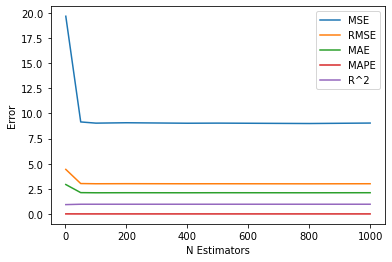

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting Error v. N Estimators
ax = error_rf_df.set_index('n').plot()
ax.set(xlabel = 'N Estimators', ylabel = 'Error')


Random Forest Regressor MSE: 9.016431680547676 
Random Forest Regressor RMSE: 3.0027373645638202 
Random Forest Regressor MAE: 2.1097501347571126 
Random Forest Regressor MAPE: 0.004522387404462939 
Random Forest Regressor R-Squared: 0.9682965961916568 



[Text(0.5, 1.0, 'Predicted vs Actual Hourly Energy Output (Random Forest Regressor)'),
 Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted')]

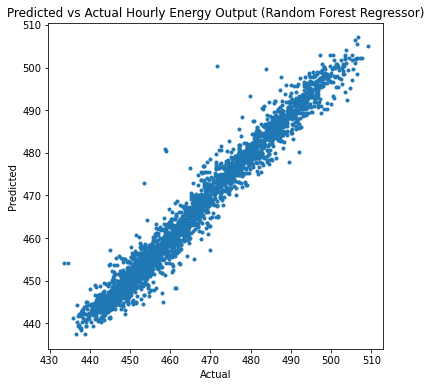

In [15]:
# Random Forest: using best perfoming n
rf = RandomForestRegressor(n_estimators = 1000)
rf = rf.fit(xtrain, ytrain)
ypred_rf = rf.predict(xtest)

# Errors
rf_rmse = sqrt(mean_squared_error(ytest, ypred_rf))
rf_mse = mean_squared_error(ytest, ypred_rf)
rf_mae = mean_absolute_error(ytest, ypred_rf)
rf_mape = mean_absolute_percentage_error(ytest, ypred_rf)
rf_r2 = r2_score(ytest, ypred_rf)


print("\nRandom Forest Regressor MSE:", rf_mse,
      "\nRandom Forest Regressor RMSE:", rf_rmse,
      "\nRandom Forest Regressor MAE:", rf_mae,
      "\nRandom Forest Regressor MAPE:", rf_mape,
      "\nRandom Forest Regressor R-Squared:", rf_r2, "\n")

# Plotting Decision Tree Regressor
f = plt.figure(figsize = (6,6))
ax = plt.axes()
ax.plot(ytest, ypred_rf, marker = 'o', ms = 3.0, ls = '')
ax.set(title = 'Predicted vs Actual Hourly Energy Output (Random Forest Regressor)', xlabel = 'Actual', ylabel = 'Predicted')

### Support Vector Regressor


Support Vector Regressor MSE: 190.44488553713026 
Support Vector Regressor RMSE: 13.800177011079613 
Support Vector Regressor MAE: 11.369380610939576 
Support Vector Regressor MAPE: 0.02409240760951103 
Support Vector Regressor R-Squared: 0.3303613532121161 



[Text(0.5, 1.0, 'Predicted vs Actual Hourly Energy Output (Support Vector Regressor)'),
 Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted')]

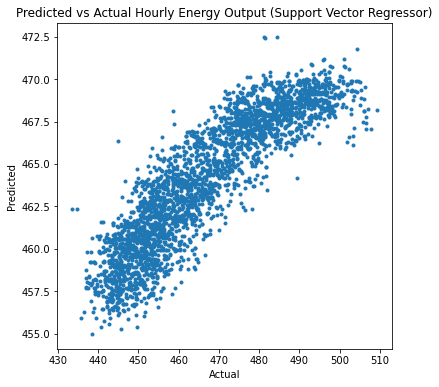

In [16]:
from sklearn.svm import SVR

# SVM
svr = SVR().fit(xtrain, ytrain)
ypred_svr = svr.predict(xtest)

# Errors
svr_rmse = sqrt(mean_squared_error(ytest, ypred_svr))
svr_mse = mean_squared_error(ytest, ypred_svr)
svr_mae = mean_absolute_error(ytest, ypred_svr)
svr_mape = mean_absolute_percentage_error(ytest, ypred_svr)
svr_r2 = r2_score(ytest, ypred_svr)


print("\nSupport Vector Regressor MSE:", svr_mse,
      "\nSupport Vector Regressor RMSE:", svr_rmse,
      "\nSupport Vector Regressor MAE:", svr_mae,
      "\nSupport Vector Regressor MAPE:", svr_mape,
      "\nSupport Vector Regressor R-Squared:", svr_r2, "\n")

# Plotting Decision Tree Regressor
f = plt.figure(figsize = (6,6))
ax = plt.axes()
ax.plot(ytest, ypred_svr, marker = 'o', ms = 3.0, ls = '')
ax.set(title = 'Predicted vs Actual Hourly Energy Output (Support Vector Regressor)', xlabel = 'Actual', ylabel = 'Predicted')

### Model Performance Analysis

In [17]:
labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'KNN', 'DTR', 'RF', 'SVR']

rmse_vals = [rmse_LR, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse, knn_rmse, dtr_rmse, rf_rmse, svr_rmse]
mse_vals = [mse_LR, ridgeCV_mse, lassoCV_mse, elasticNetCV_mse, knn_mse, dtr_mse, rf_mse, svr_mse]
mae_vals = [mae_LR, ridgeCV_mae, lassoCV_mae, elasticNetCV_mae, knn_mae, dtr_mae, rf_mae, svr_mae]
mape_vals = [mape_LR, ridgeCV_mape, lassoCV_mape, elasticNetCV_mape, knn_mape, dtr_mape, rf_mape, svr_mape]
r2_vals = [r2_LR, ridgeCV_r2, lassoCV_r2, elasticNetCV_r2, knn_r2, dtr_r2, rf_r2, svr_r2]

error_df = pd.Series(mse_vals, index = labels).to_frame()
error_df.rename(columns = {0: 'MSE'}, inplace = 1)
error_df['RMSE'] = pd.Series(rmse_vals, index = labels)
error_df['MAE'] = pd.Series(mae_vals, index = labels)
error_df['MAPE'] = pd.Series(mape_vals, index = labels)
error_df['R^2'] = pd.Series(r2_vals, index = labels)

error_df

,MSE,RMSE,MAE,MAPE,R^2
Linear,22.208463,4.712586,3.758167,0.008065,0.921911
Ridge,22.208463,4.712586,3.758167,0.008065,0.921911
Lasso,22.208459,4.712585,3.758166,0.008065,0.921911
ElasticNet,22.208460,4.712585,3.758168,0.008065,0.921911
KNN,14.782327,3.844779,2.838465,0.006092,0.948023
DTR,14.354885,3.788784,2.452637,0.005256,0.949526
RF,9.016432,3.002737,2.109750,0.004522,0.968297
SVR,190.444886,13.800177,11.369381,0.024092,0.330361


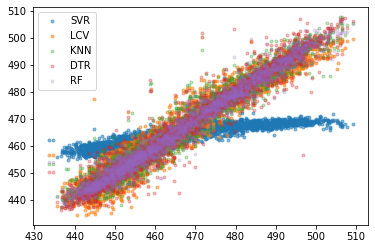

In [18]:
plt.plot(ytest, ypred_svr, marker = 'o', ms = 3.0, ls = '', alpha = 0.5, label = 'SVR')
#plt.plot(ytest, ypred_LR, marker = 'o', ms = 3.0, ls = '', alpha = 0.5, label = 'LR')
#plt.plot(ytest, ypred_RCV, marker = 'o', ms = 3.0, ls = '', alpha = 0.5, label = 'RCV')
plt.plot(ytest, ypred_RCV, marker = 'o', ms = 3.0, ls = '', alpha = 0.5, label = 'LCV')
#plt.plot(ytest, ypred_RCV, marker = 'o', ms = 3.0, ls = '', alpha = 0.5, label = 'ENCV')
plt.plot(ytest, ypred_KNN, marker = 'o', ms = 3.0, ls = '', alpha = 0.3, label = 'KNN') 
plt.plot(ytest, ypred_dtr, marker = 'o', ms = 3.0, ls = '', alpha = 0.3, label = 'DTR') 
plt.plot(ytest, ypred_rf, marker = 'o', ms = 3.0, ls = '', alpha = 0.2, label = 'RF') 
plt.legend()

Text(0.5, 1.0, 'Support Vector Regression')

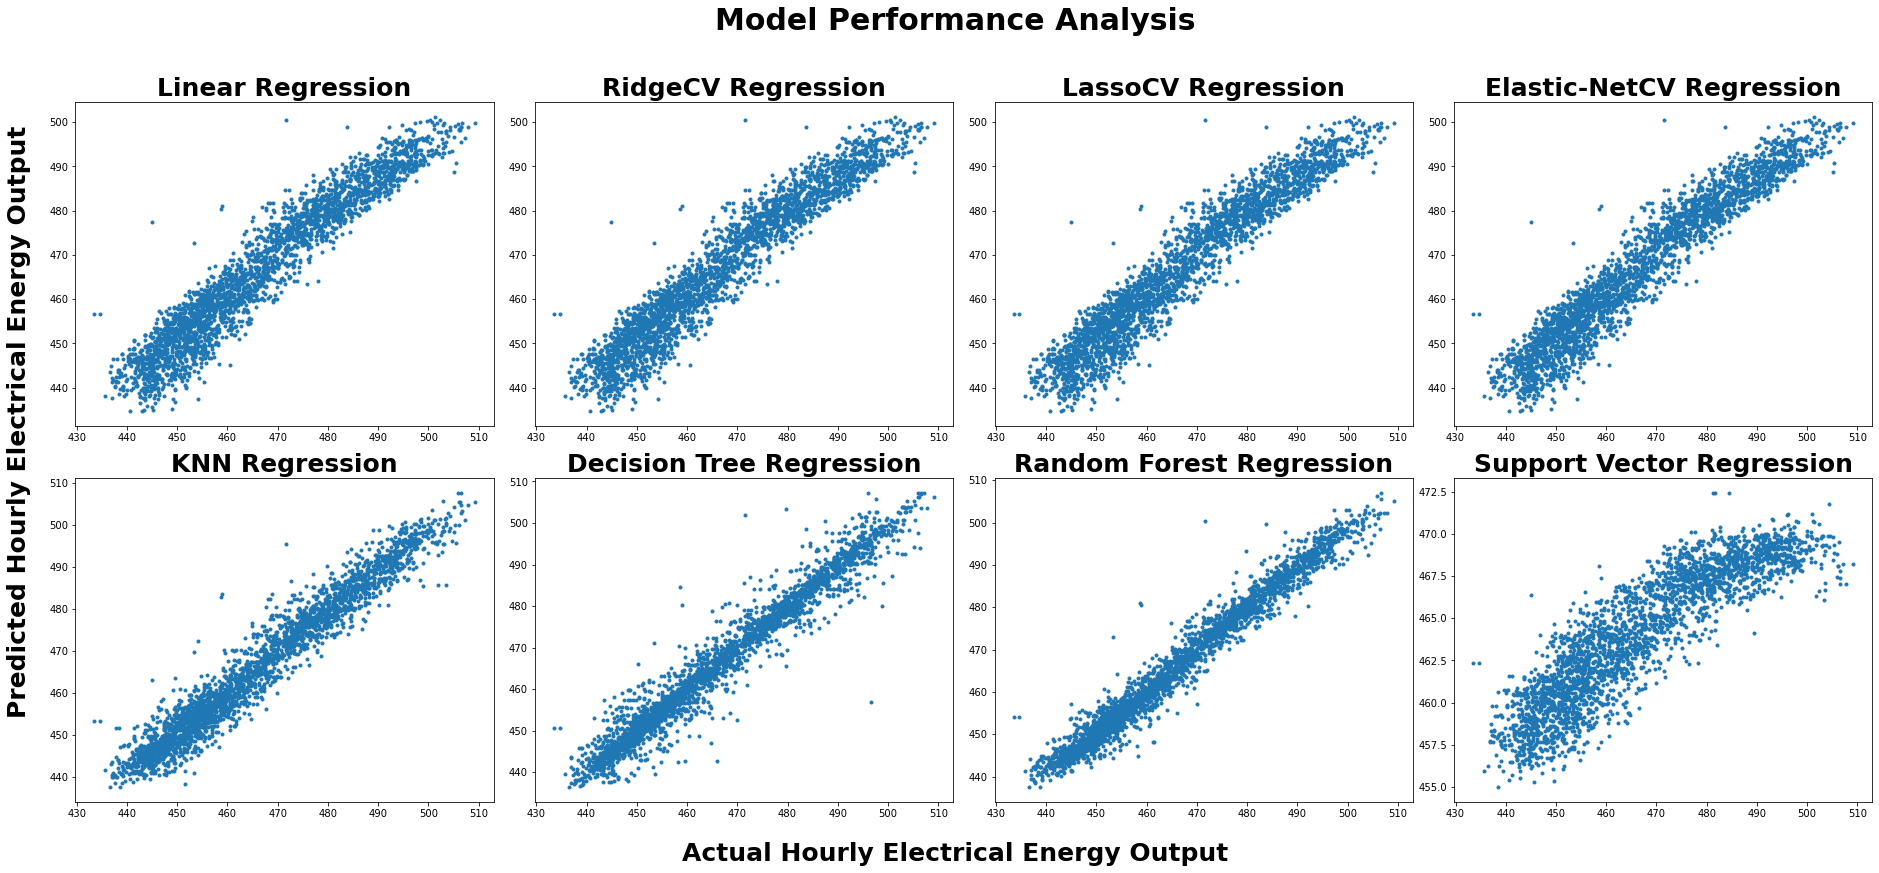

In [26]:
fig, ax = plt.subplots(2, 4, figsize = (26, 12))
fig.tight_layout(h_pad = 4)
fig.suptitle('Model Performance Analysis', fontsize = 30, fontweight = 'bold')

fig.text(0.5, 0, 'Actual Hourly Electrical Energy Output', ha='center', va='center', fontsize = 25, fontweight = 'bold')
fig.text(0, 0.5, 'Predicted Hourly Electrical Energy Output', ha='center', va='center', rotation='vertical', fontsize = 25, fontweight = 'bold')

plt.subplots_adjust(top = 0.87, left = 0.03, bottom = 0.06)

ax[0, 0].plot(ytest, ypred_LR, marker = 'o', ms = 3.0, ls = '')
ax[0, 0].set_title('Linear Regression', fontweight = 'bold', fontsize = 25)

ax[0, 1].plot(ytest, ypred_RCV, marker = 'o', ms = 3.0, ls = '')
ax[0, 1].set_title('RidgeCV Regression', fontweight = 'bold', fontsize = 25)

ax[0, 2].plot(ytest, ypred_LCV, marker = 'o', ms = 3.0, ls = '')
ax[0, 2].set_title('LassoCV Regression', fontweight = 'bold', fontsize = 25)

ax[0, 3].plot(ytest, ypred_ENCV, marker = 'o', ms = 3.0, ls = '')
ax[0, 3].set_title('Elastic-NetCV Regression', fontweight = 'bold', fontsize = 25)

ax[1, 0].plot(ytest, ypred_KNN, marker = 'o', ms = 3.0, ls = '')
ax[1, 0].set_title('KNN Regression', fontweight = 'bold', fontsize = 25)

ax[1, 1].plot(ytest, ypred_dtr, marker = 'o', ms = 3.0, ls = '')
ax[1, 1].set_title('Decision Tree Regression', fontweight = 'bold', fontsize = 25)

ax[1, 2].plot(ytest, ypred_rf, marker = 'o', ms = 3.0, ls = '')
ax[1, 2].set_title('Random Forest Regression', fontweight = 'bold', fontsize = 25)

ax[1, 3].plot(ytest, ypred_svr, marker = 'o', ms = 3.0, ls = '')
ax[1, 3].set_title('Support Vector Regression', fontweight = 'bold', fontsize = 25)

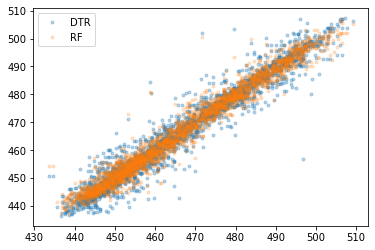

In [20]:
plt.plot(ytest, ypred_dtr, marker = 'o', ms = 3.0, ls = '', alpha = 0.3, label = 'DTR') 
plt.plot(ytest, ypred_rf, marker = 'o', ms = 3.0, ls = '', alpha = 0.2, label = 'RF') 
plt.legend()

### Pairplot

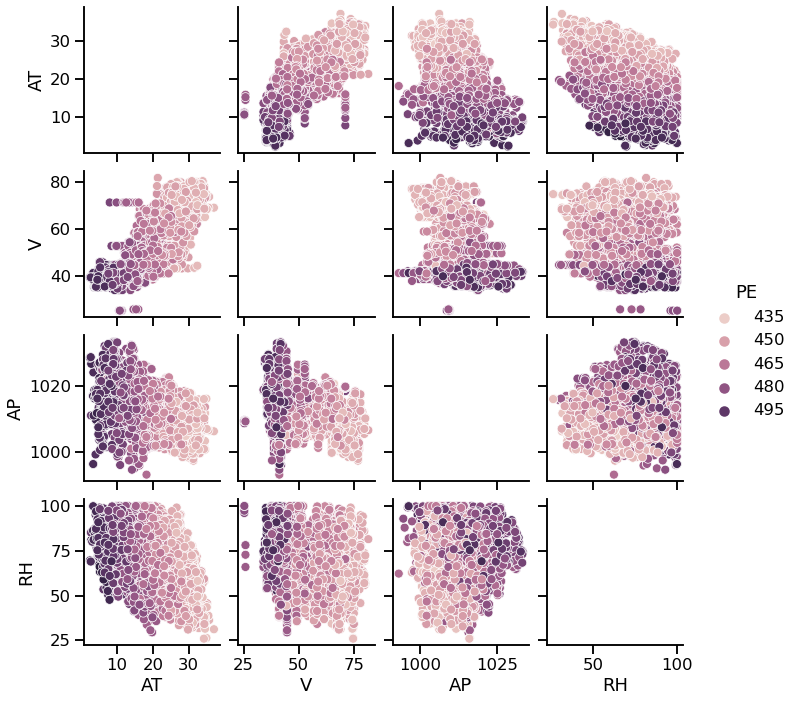

In [21]:
sns.set_context('talk')
sns.pairplot(data = train, hue = 'PE')

### Correlation Matrix

<AxesSubplot:>

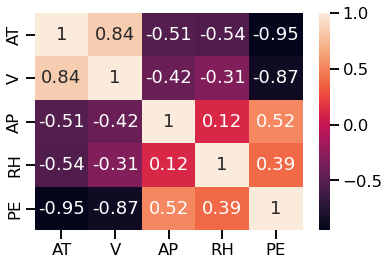

In [22]:
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot = True)

### Predicting Net Hourly Electrical Energy Output for New Data

In [28]:
test

,AT,V,AP,RH
0,16.98,53.16,1013.95,82.80
1,9.60,41.03,1021.01,69.03
2,6.11,38.68,1017.53,79.23
3,12.34,43.22,1009.28,78.23
4,27.67,59.14,1016.51,61.20
...,...,...,...,...
38267,14.60,53.82,1016.28,64.83
38268,29.67,66.51,1015.60,34.10
38269,20.13,47.03,1012.59,83.03
38270,27.14,70.32,1007.08,73.08


In [24]:
PE = rf.predict(test)
PE

array([473.25427449, 490.84386312, 495.70327781, ..., 468.32338122,
       447.11732469, 465.66440218])

In [25]:
test_predicted = test.copy()
test_predicted['PE'] = PE
test_predicted

,AT,V,AP,RH,PE
0,16.98,53.16,1013.95,82.80,473.254274
1,9.60,41.03,1021.01,69.03,490.843863
2,6.11,38.68,1017.53,79.23,495.703278
3,12.34,43.22,1009.28,78.23,480.961193
4,27.67,59.14,1016.51,61.20,448.666474
...,...,...,...,...,...
38267,14.60,53.82,1016.28,64.83,474.870863
38268,29.67,66.51,1015.60,34.10,447.316109
38269,20.13,47.03,1012.59,83.03,468.323381
38270,27.14,70.32,1007.08,73.08,447.117325
